<a href="https://colab.research.google.com/github/1exip/Learning-PyTorch/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [0]:
URL = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
csv = requests.get(URL).content
housing = pd.read_csv(io.StringIO(csv.decode('utf-8')))

In [0]:
URL

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

In [0]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

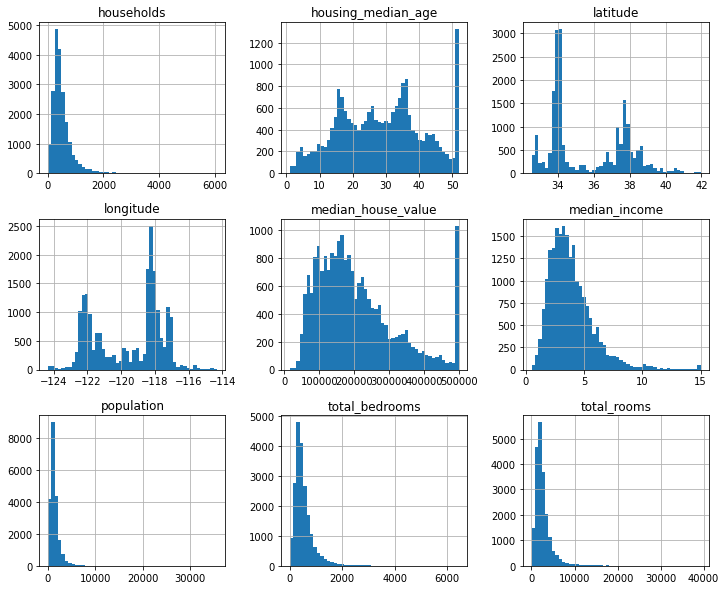

In [0]:
housing.hist(bins=50,figsize=(12,10))
plt.show()

In [0]:
train, test = train_test_split(housing,test_size = 0.2, random_state = 42)

In [0]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0.,1.5,3.0,4.5,6,np.inf],
                               labels = [1,2,3,4,5])

In [0]:
np.max(housing['median_income'])

15.0001

In [0]:
stratsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratsplit.split(housing, housing['income_cat']):
  strat_train = housing.loc[train_index]
  strat_test = housing.loc[test_index]

In [0]:
print('Stratified Test Set')
print(strat_test['income_cat'].value_counts(ascending=False) / len(strat_test))
print('\n')
print('Stratified Train Set')
print(strat_train['income_cat'].value_counts(ascending=False) / len(strat_train))

Stratified Test Set
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


Stratified Train Set
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64


In [0]:
for set in (strat_train, strat_test):
  set.drop('income_cat',axis=1,inplace=True)

In [0]:
explore_set = strat_train.copy()

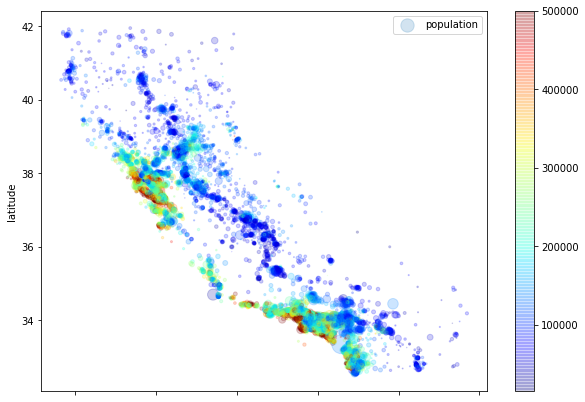

In [0]:
explore_set.plot(kind='scatter',x='longitude',y='latitude', alpha=0.2, figsize=(10,7),
                 s=explore_set['population']/100, label= 'population',
                 c=explore_set['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [0]:
correlation = explore_set.corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

[]

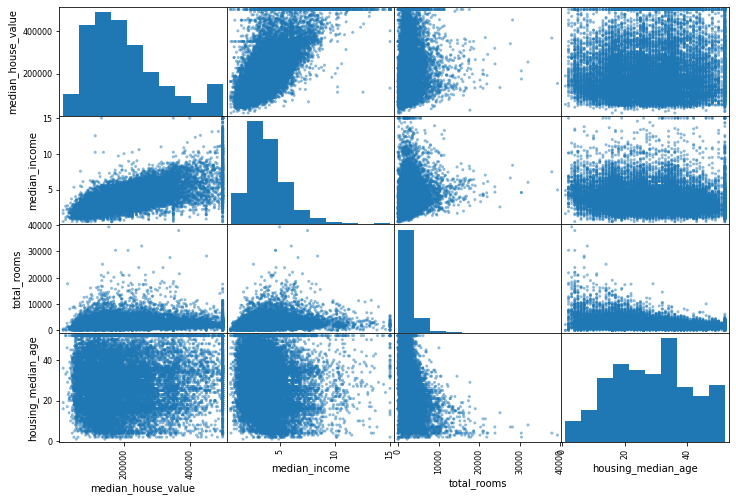

In [0]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(explore_set[attributes], figsize=(12,8))
plt.plot()

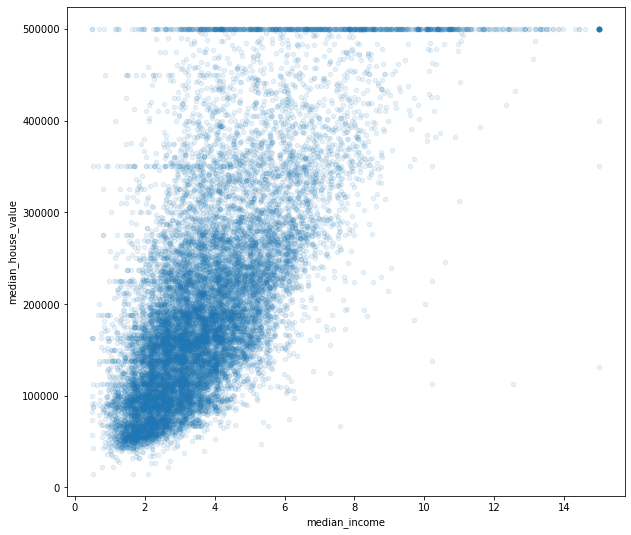

In [0]:
explore_set.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,figsize=(10,9))

In [0]:
explore_set['rooms_per_household'] = explore_set['total_rooms'] / explore_set['households']
explore_set['bedrooms_per_room'] = explore_set['total_bedrooms'] / explore_set['total_rooms']
explore_set['population_per_household'] = explore_set['population'] / explore_set['households']

In [0]:
correlation = explore_set.corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [0]:
housing = strat_train.drop('median_house_value', axis=1)
housing_labels = strat_train['median_house_value'].copy()

In [0]:
imputer = SimpleImputer(strategy='median')
housing_numerical = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_numerical)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
X = imputer.transform(housing_numerical)
housing_transformed = pd.DataFrame(X, columns=housing_numerical.columns,index=housing_numerical.index)

In [0]:
housing_cat = housing[['ocean_proximity']]

In [0]:
onehot_encoder = OneHotEncoder()
housing_cat_onehot = onehot_encoder.fit_transform(housing_cat)
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]